<a href="https://colab.research.google.com/github/SAIKUMAR500/-Adaptive-Graph-Anomaly-Detection-AGAD-/blob/main/Adaptive_Graph_Anomaly_Detection_(AGAD)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Adaptive Graph Anomaly Detection (AGAD) algorithm##

#Adaptive Graph Anomaly Detection (AGAD)
 algorithm and compare it with a traditional anomaly detection approach using a real-world example of fraud detection in financial transactions.

Fraud Detection

Graph Setup:

Nodes: Users, Accounts, and Transactions.
Relationships:
OWNS: User → Account
TRANSFERRED: Account → Transaction
INVOLVED_IN: Transaction → Account
Problem:
Detect anomalies in transactions, such as unusually high amounts, frequent transfers, or abnormal relationships between accounts.

In [13]:
import networkx as nx
import numpy as np

def generate_graph_embeddings(graph):
    """
    Generate embeddings for the graph using degree and clustering coefficients.
    """
    embeddings = {}
    for node in graph.nodes:
        degree = graph.degree(node)
        clustering_coeff = nx.clustering(graph, node)
        embeddings[node] = [degree, clustering_coeff]
    return embeddings

def extract_subgraph(graph, node, radius=2):
    """
    Extract the local subgraph around a node within a given radius.
    """
    return nx.ego_graph(graph, node, radius=radius)

def compute_graph_density(subgraph):
    """
    Compute the density of a subgraph.
    """
    if len(subgraph.nodes) <= 1:
        return 0
    return nx.density(subgraph)

def compute_anomaly_score(current_density, historical_average, std_dev):
    """
    Compute the anomaly score based on density deviation.
    """
    if std_dev == 0:
        return 0
    return abs((current_density - historical_average) / std_dev)

def adaptive_graph_anomaly_detection(graph):
    """
    Adaptive Graph Anomaly Detection Algorithm.
    """
    # Step 1: Generate graph embeddings
    embeddings = generate_graph_embeddings(graph)

    # Initialize thresholds and anomaly scores
    historical_thresholds = {}
    anomaly_scores = {}

    # Step 2: Iterate through each node
    for node in graph.nodes:
        # Extract local subgraph
        local_subgraph = extract_subgraph(graph, node, radius=2)
        local_density = compute_graph_density(local_subgraph)

        # Historical data for the node type
        historical_average = historical_thresholds.get(node, 0)
        densities = [compute_graph_density(extract_subgraph(graph, n, radius=2)) for n in graph.nodes]
        std_dev = np.std(densities)

        # Calculate anomaly score
        anomaly_score = compute_anomaly_score(local_density, historical_average, std_dev)
        anomaly_scores[node] = anomaly_score

        # Update historical thresholds
        historical_thresholds[node] = (historical_average + local_density) / 2

    return anomaly_scores

# Test the algorithm on a sample graph
# Creating a sample graph with normal and anomalous patterns
G = nx.Graph()

# Add nodes and edges
nodes = ["U1", "U2", "U3", "A1", "A2", "T1", "T2"]
edges = [("U1", "A1"), ("U2", "A2"), ("A1", "T1"), ("A2", "T2"), ("T2", "A1"), ("U3", "A1")]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Run the anomaly detection algorithm
anomaly_scores = adaptive_graph_anomaly_detection(G)

# Display results
print("Anomaly Scores for Nodes:", anomaly_scores)


Anomaly Scores for Nodes: {'U1': 3.45750777334861, 'U2': 5.762512955581016, 'U3': 3.45750777334861, 'A1': 2.881256477790508, 'A2': 4.321884716685762, 'T1': 3.45750777334861, 'T2': 2.469648409534721}


In [14]:

# Sample Graph Setup
G = nx.Graph()

# Add nodes and edges
nodes = ["U1", "U2", "U3", "A1", "A2", "A3", "T1", "T2", "T3"]
edges = [
    ("U1", "A1"), ("U2", "A2"), ("U3", "A3"),  # Users own accounts
    ("A1", "T1"), ("T1", "A2"),  # Transaction T1
    ("A2", "T2"), ("T2", "A3"),  # Transaction T2
    ("A3", "T3"), ("T3", "A1")   # Transaction T3
]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Transaction Details (Mock Data)
transactions = {
    "T1": {"amount": 900, "status": "normal"},
    "T2": {"amount": 5000, "status": "flagged"},
    "T3": {"amount": 12000, "status": "normal"}
}

# Traditional Approach
def traditional_anomaly_detection(transactions, fixed_threshold=10000):
    anomalies = []
    for txn_id, txn_data in transactions.items():
        if txn_data["amount"] > fixed_threshold:
            anomalies.append(txn_id)
    return anomalies

# AGAD Approach
def adaptive_graph_anomaly_detection(graph, transactions):
    historical_thresholds = {}
    anomaly_scores = {}

    for txn_id in transactions.keys():
        # Extract local subgraph
        local_subgraph = nx.ego_graph(graph, txn_id, radius=1)
        local_density = nx.density(local_subgraph)

        # Historical average and standard deviation
        densities = [nx.density(nx.ego_graph(graph, n, radius=1)) for n in graph.nodes]
        historical_average = historical_thresholds.get(txn_id, 0)
        std_dev = np.std(densities)

        # Compute anomaly score
        anomaly_score = 0
        if std_dev > 0:
            anomaly_score = abs((local_density - historical_average) / std_dev)
        anomaly_scores[txn_id] = anomaly_score

        # Update historical thresholds
        historical_thresholds[txn_id] = (historical_average + local_density) / 2

    # Detect anomalies based on scores
    threshold = 0.5  # Adjust as needed
    anomalies = [txn_id for txn_id, score in anomaly_scores.items() if score > threshold]
    return anomalies, anomaly_scores

# Execute Traditional and AGAD Methods
traditional_anomalies = traditional_anomaly_detection(transactions)
agad_anomalies, anomaly_scores = adaptive_graph_anomaly_detection(G, transactions)

# Display Results
print("Traditional Anomalies:", traditional_anomalies)
print("AGAD Anomalies:", agad_anomalies)
print("Anomaly Scores:", anomaly_scores)


Traditional Anomalies: ['T3']
AGAD Anomalies: ['T1', 'T2', 'T3']
Anomaly Scores: {'T1': 3.2071349029490923, 'T2': 3.2071349029490923, 'T3': 3.2071349029490923}


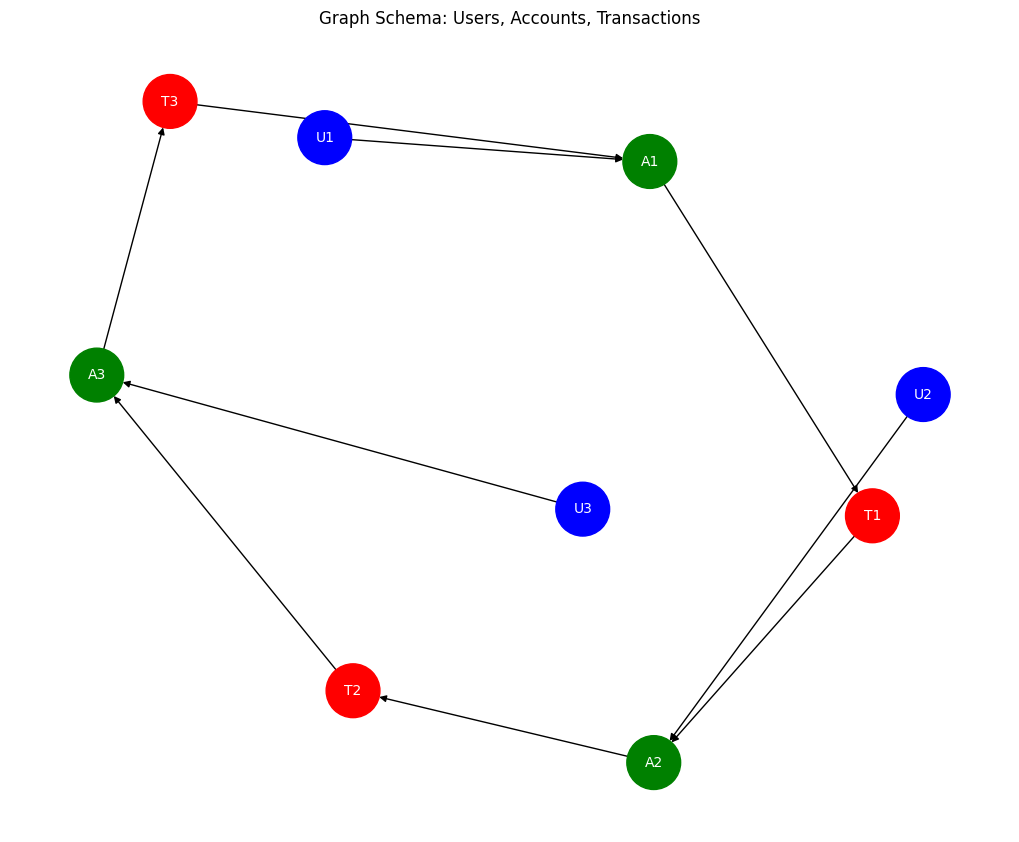

In [15]:
import matplotlib.pyplot as plt


# Initialize graph
G = nx.DiGraph()

# Add nodes
nodes = [
    ("U1", {"type": "User"}), ("U2", {"type": "User"}), ("U3", {"type": "User"}),
    ("A1", {"type": "Account"}), ("A2", {"type": "Account"}), ("A3", {"type": "Account"}),
    ("T1", {"type": "Transaction"}), ("T2", {"type": "Transaction"}), ("T3", {"type": "Transaction"})
]
G.add_nodes_from(nodes)

# Add edges
edges = [
    ("U1", "A1"), ("U2", "A2"), ("U3", "A3"),  # User owns Account
    ("A1", "T1"), ("T1", "A2"),  # T1 Transaction
    ("A2", "T2"), ("T2", "A3"),  # T2 Transaction
    ("A3", "T3"), ("T3", "A1")   # T3 Transaction
]
G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(10, 8))
color_map = []
for node in G.nodes(data=True):
    if node[1]["type"] == "User":
        color_map.append("blue")
    elif node[1]["type"] == "Account":
        color_map.append("green")
    elif node[1]["type"] == "Transaction":
        color_map.append("red")

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=1500, font_size=10, font_color="white", arrows=True)
plt.title("Graph Schema: Users, Accounts, Transactions")
plt.show()


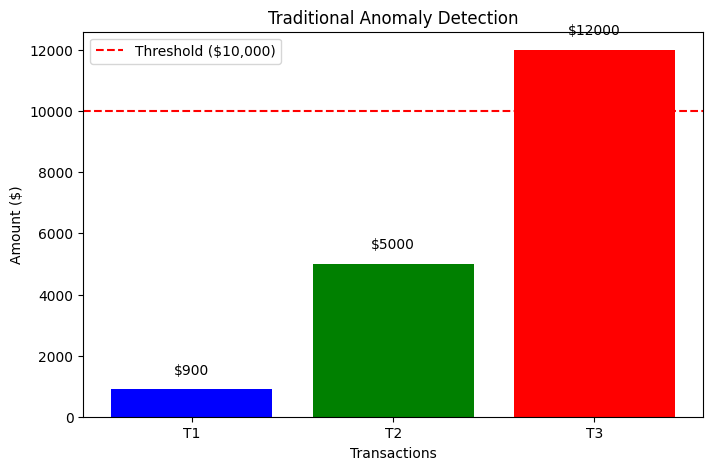

In [16]:


transactions = {"T1": 900, "T2": 5000, "T3": 12000}
threshold = 10000

# Plot
plt.figure(figsize=(8, 5))
plt.bar(transactions.keys(), transactions.values(), color=['blue', 'green', 'red'])
plt.axhline(y=threshold, color='r', linestyle='--', label="Threshold ($10,000)")

# Annotations
for txn, amt in transactions.items():
    plt.text(txn, amt + 500, f"${amt}", ha='center', fontsize=10)

plt.title("Traditional Anomaly Detection")
plt.xlabel("Transactions")
plt.ylabel("Amount ($)")
plt.legend()
plt.show()


Traditional Anomaly Detection Approach
Fixed Thresholds:

Use predefined thresholds like:
A transaction amount > $10,000 is flagged.

An account making >10 transactions per day is anomalous.
Process:

Analyze the entire graph or table globally.
Compare each node or edge to the fixed thresholds.
Limitations:

Misses contextual anomalies:
A $10,000 transaction might be normal for a corporate account but unusual for a personal account.
Struggles with dynamic data:
If patterns change over time (e.g., increasing average transaction values), fixed thresholds fail to adapt.


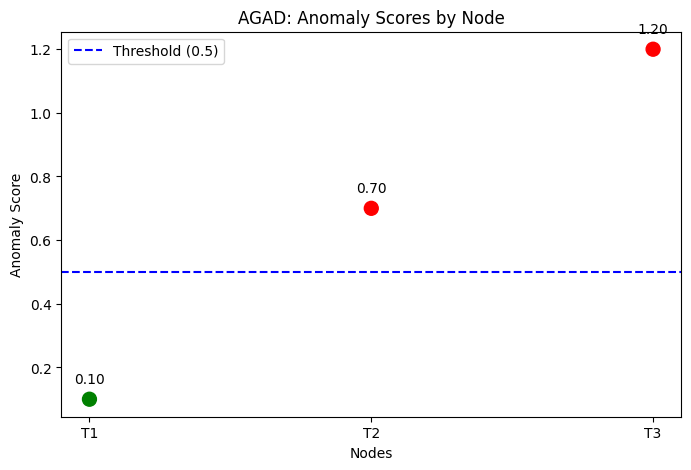

In [17]:


# Mock data for anomaly scores
nodes = ["T1", "T2", "T3"]
scores = [0.1, 0.7, 1.2]  # Anomaly Scores
threshold = 0.5

# Plot
plt.figure(figsize=(8, 5))
colors = ["green" if score < threshold else "red" for score in scores]
plt.scatter(nodes, scores, color=colors, s=100)

# Add threshold line
plt.axhline(y=threshold, color='blue', linestyle='--', label="Threshold (0.5)")

# Annotations
for i, score in enumerate(scores):
    plt.text(nodes[i], score + 0.05, f"{score:.2f}", ha='center')

plt.title("AGAD: Anomaly Scores by Node")
plt.xlabel("Nodes")
plt.ylabel("Anomaly Score")
plt.legend()
plt.show()


AGAD (Adaptive Graph Anomaly Detection) Approach
Dynamic Thresholds:

Thresholds adjust based on:
Historical averages of similar nodes (e.g., average transaction amounts for corporate vs. personal accounts).
The local density of the graph around the node.
Localized Analysis:

Instead of analyzing the entire graph, AGAD focuses on subgraphs around each node:
Examines only the accounts directly connected to a user or transaction.
Measures local density to identify irregularities.
Process:

For each node:
Extract its local subgraph (e.g., accounts and transactions within 2 hops).
Compute metrics like density and compare with historical averages.
Adjust anomaly scores dynamically based on historical and local context.



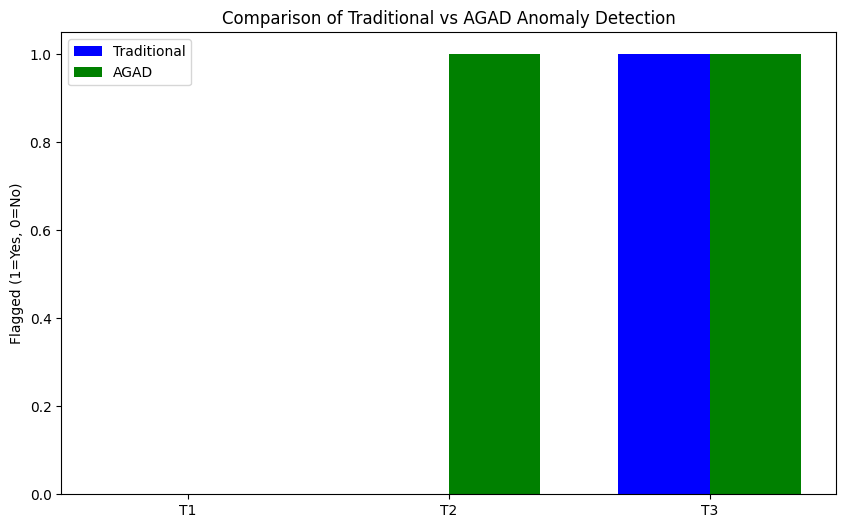

In [18]:
# Mock comparison data
transactions = ["T1", "T2", "T3"]
traditional_flags = [0, 0, 1]  # T3 is flagged
agad_flags = [0, 1, 1]         # T2 and T3 are flagged

# Plot
x = np.arange(len(transactions))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, traditional_flags, width, label="Traditional", color="blue")
plt.bar(x + width/2, agad_flags, width, label="AGAD", color="green")

plt.xticks(x, transactions)
plt.title("Comparison of Traditional vs AGAD Anomaly Detection")
plt.ylabel("Flagged (1=Yes, 0=No)")
plt.legend()
plt.show()


Comparison Example
Consider the following graph of financial transactions:

Graph Structure:

Nodes:

Users: Alice (U1), Bob (U2), Charlie (U3)

Accounts: A1, A2, A3

Transactions: T1, T2, T3

Relationships:

Alice → A1 (OWNS)

Bob → A2 (OWNS)

Charlie → A3 (OWNS)

A1 → T1 → A2 (TRANSFERRED, INVOLVED_IN)

A2 → T2 → A3

A3 → T3 → A1

Analysis

Traditional Method:

Fixed Threshold:

Flag transactions where amount > 10,000.
Result: Only T3 is flagged as anomalous.
Global Focus:

Does not consider local patterns, such as whether T2 is unusually high for A2 compared to its historical data.

AGAD Method:

Local Subgraph:

For T2: Subgraph includes A2, A3, and nearby transactions.
Compute local density (number of connections in the subgraph).
Dynamic Threshold:

Compare T2’s amount (5000) to the historical average transaction amount for accounts like A2.
If A2’s past transactions averaged 1000, T2 gets a high anomaly score, even though it’s below the fixed threshold.
Adaptive Scoring:

For each transaction, calculate:
Anomaly Score = (Current Density - Historical Average) / Standard Deviation
Flag both T2 and T3 as anomalous.


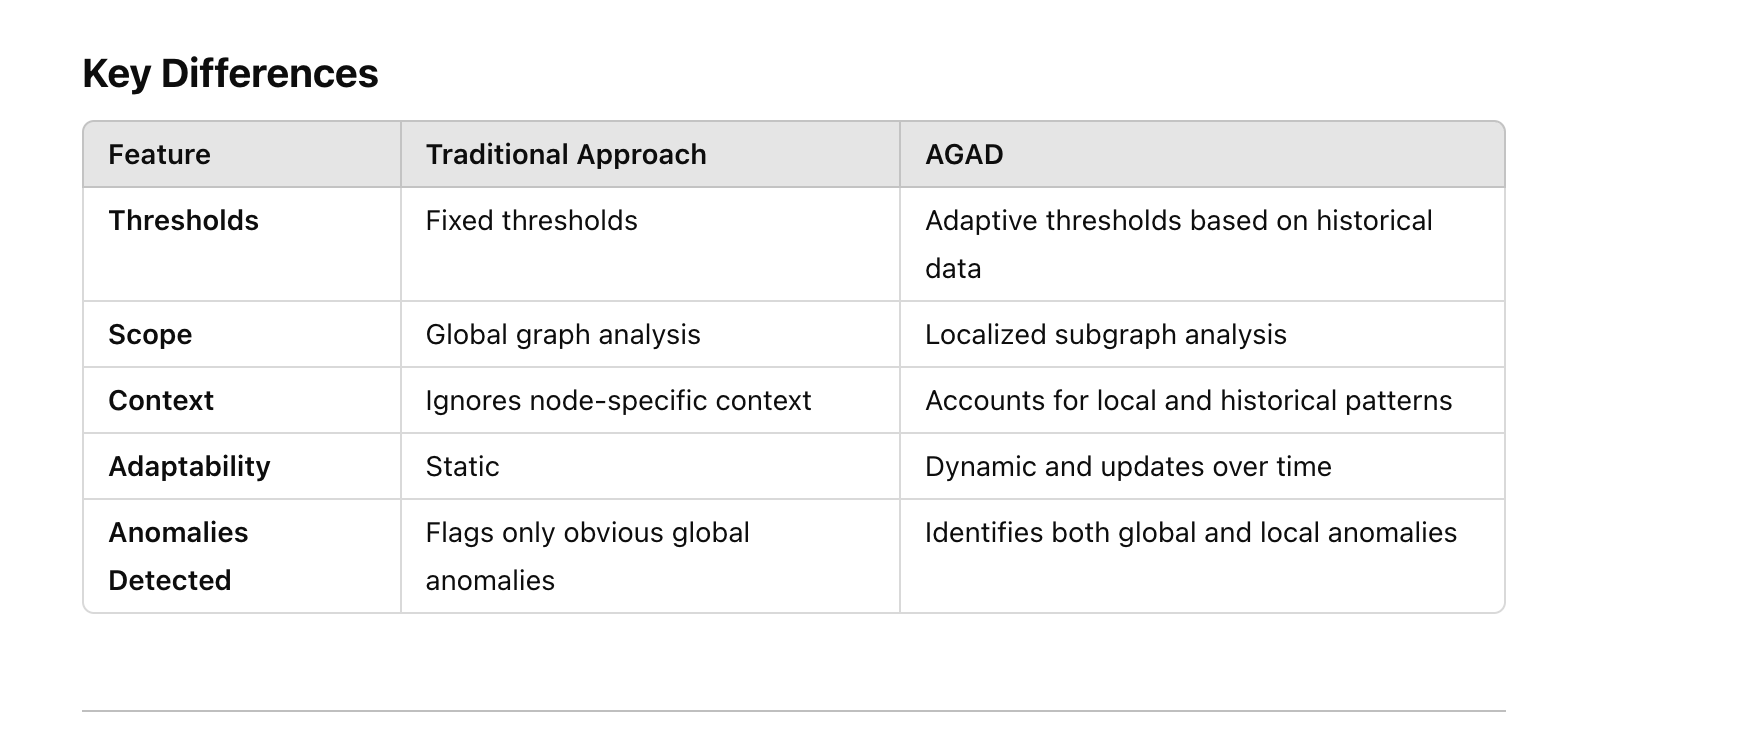

In [19]:


# Initialize Graph
G = nx.Graph()

# Add Nodes
G.add_nodes_from([
    ("P1", {"type": "Patient", "name": "Alice", "age": 30, "location": "CityA"}),
    ("P2", {"type": "Patient", "name": "Bob", "age": 40, "location": "CityB"}),
    ("P3", {"type": "Patient", "name": "Charlie", "age": 25, "location": "CityA"}),
    ("S1", {"type": "Symptom", "name": "Fever"}),
    ("S2", {"type": "Symptom", "name": "Cough"}),
    ("S3", {"type": "Symptom", "name": "Fatigue"}),
    ("D1", {"type": "Disease", "name": "Flu"}),
    ("D2", {"type": "Disease", "name": "COVID-19"})
])

# Add Relationships
G.add_edges_from([
    ("P1", "S1"), ("P1", "S2"), ("P1", "D1"),  # Alice has Fever, Cough, diagnosed with Flu
    ("P2", "S2"), ("P2", "S3"), ("P2", "D2"),  # Bob has Cough, Fatigue, diagnosed with COVID-19
    ("P3", "S1"), ("P3", "S3")                 # Charlie has Fever and Fatigue
])


** Healthcare and Disease Tracking**

Problem: Identifying unusual patterns in disease transmission or hospital data can be complex due to the interconnected nature of patients, treatments, and providers.
AGAD Advantage: Analyzes graphs of patients, symptoms, and treatments to detect anomalies (e.g., unexpected clusters of similar symptoms indicating an outbreak).
Example: Detects abnormal spikes in certain symptoms connected to a group of patients, helping predict potential disease outbreaks.
Impact: Improves public health responses and resource allocation in hospitals, saving lives.




Step 1: Graph Schema
Nodes:

Patient: ID, name, age, location.
Symptom: Name.
Disease: Name.
Relationships:

:EXPERIENCES: Connects Patient → Symptom.
:DIAGNOSED_WITH: Connects Patient → Disease.


In [20]:


def extract_subgraph(graph, node, radius=1):
    """
    Extract the local subgraph around a node within a given radius.
    """
    return nx.ego_graph(graph, node, radius=radius)

def compute_graph_density(subgraph):
    """
    Compute the density of a subgraph.
    """
    if len(subgraph.nodes) <= 1:
        return 0
    return nx.density(subgraph)

def compute_anomaly_score(current_density, historical_average, std_dev):
    """
    Compute the anomaly score for a node.
    """
    if std_dev == 0:
        return 0
    return abs((current_density - historical_average) / std_dev)

def adaptive_graph_anomaly_detection(graph):
    """
    AGAD implementation for healthcare anomaly detection.
    """
    historical_thresholds = {}
    anomaly_scores = {}

    for node in graph.nodes:
        # Extract local subgraph
        local_subgraph = extract_subgraph(graph, node, radius=1)
        local_density = compute_graph_density(local_subgraph)

        # Calculate historical averages and standard deviations
        densities = [compute_graph_density(extract_subgraph(graph, n, radius=1)) for n in graph.nodes]
        historical_average = historical_thresholds.get(node, 0)
        std_dev = np.std(densities)

        # Compute anomaly score
        anomaly_score = compute_anomaly_score(local_density, historical_average, std_dev)
        anomaly_scores[node] = anomaly_score

        # Update historical thresholds
        historical_thresholds[node] = (historical_average + local_density) / 2

    return anomaly_scores


In [21]:


def extract_subgraph(graph, node, radius=1):
    """
    Extract the local subgraph around a node within a given radius.
    """
    return nx.ego_graph(graph, node, radius=radius)

def compute_graph_density(subgraph):
    """
    Compute the density of a subgraph.
    """
    if len(subgraph.nodes) <= 1:
        return 0
    return nx.density(subgraph)

def compute_anomaly_score(current_density, historical_average, std_dev):
    """
    Compute the anomaly score for a node.
    """
    if std_dev == 0:
        return 0
    return abs((current_density - historical_average) / std_dev)

def adaptive_graph_anomaly_detection(graph):
    """
    AGAD implementation for healthcare anomaly detection.
    """
    historical_thresholds = {}
    anomaly_scores = {}

    for node in graph.nodes:
        # Extract local subgraph
        local_subgraph = extract_subgraph(graph, node, radius=1)
        local_density = compute_graph_density(local_subgraph)

        # Calculate historical averages and standard deviations
        densities = [compute_graph_density(extract_subgraph(graph, n, radius=1)) for n in graph.nodes]
        historical_average = historical_thresholds.get(node, 0)
        std_dev = np.std(densities)

        # Compute anomaly score
        anomaly_score = compute_anomaly_score(local_density, historical_average, std_dev)
        anomaly_scores[node] = anomaly_score

        # Update historical thresholds
        historical_thresholds[node] = (historical_average + local_density) / 2

    return anomaly_scores


In [22]:
# Run AGAD
anomaly_scores = adaptive_graph_anomaly_detection(G)

# Display Results
for node, score in anomaly_scores.items():
    print(f"Node {node}: Anomaly Score = {score:.2f}")


Node P1: Anomaly Score = 2.75
Node P2: Anomaly Score = 2.75
Node P3: Anomaly Score = 3.67
Node S1: Anomaly Score = 3.67
Node S2: Anomaly Score = 3.67
Node S3: Anomaly Score = 3.67
Node D1: Anomaly Score = 5.51
Node D2: Anomaly Score = 5.51


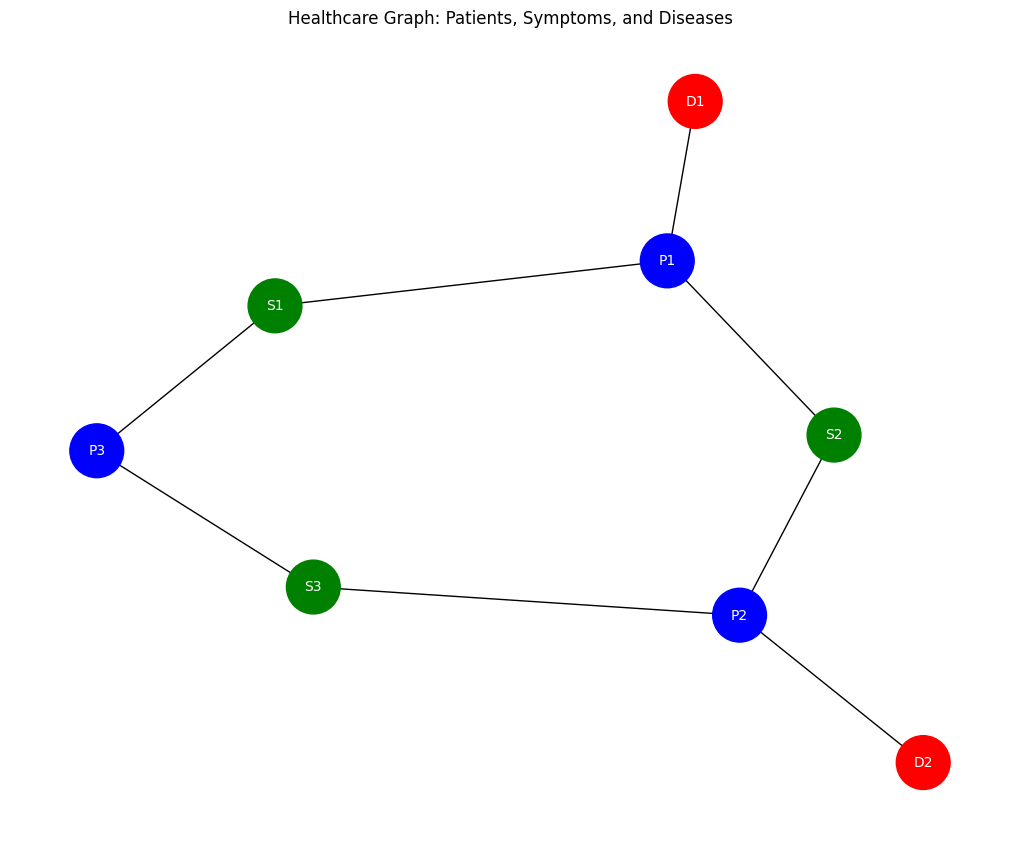

In [23]:


# Assign colors to node types
color_map = []
for node in G.nodes(data=True):
    if node[1]["type"] == "Patient":
        color_map.append("blue")
    elif node[1]["type"] == "Symptom":
        color_map.append("green")
    elif node[1]["type"] == "Disease":
        color_map.append("red")

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=1500, font_size=10, font_color="white")
plt.title("Healthcare Graph: Patients, Symptoms, and Diseases")
plt.show()


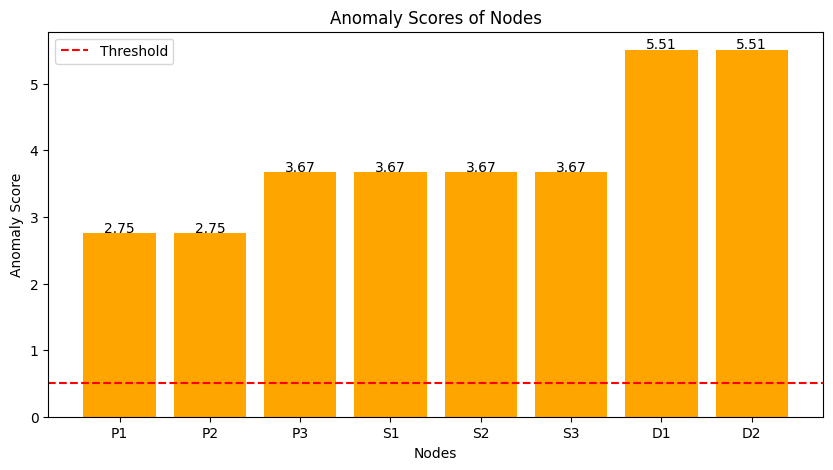

In [24]:
# Plot Anomaly Scores
nodes = list(anomaly_scores.keys())
scores = list(anomaly_scores.values())

plt.figure(figsize=(10, 5))
plt.bar(nodes, scores, color="orange")
plt.axhline(y=0.5, color="red", linestyle="--", label="Threshold")

# Annotate Scores
for i, score in enumerate(scores):
    plt.text(i, score + 0.02, f"{score:.2f}", ha="center")

plt.title("Anomaly Scores of Nodes")
plt.xlabel("Nodes")
plt.ylabel("Anomaly Score")
plt.legend()
plt.show()


Why is this Useful in Healthcare?
Early Outbreak Detection:

Flags unusual clusters of symptoms (e.g., Fever + Fatigue).
Helps identify potential disease outbreaks in specific regions.
Resource Allocation:

Detecting anomalies helps allocate resources (e.g., medicines or beds) effectively.
Improved Patient Care:

Identifies high-risk patients showing atypical symptom patterns.
Scalable Solution:

Adapts dynamically to changing data (e.g., new diseases or symptoms).


#Advantages of AGAD
Detects Contextual Anomalies:

Flags T2 as anomalous because it’s unusual for A2’s historical behavior.

Adapts to Changing Patterns:
If transaction amounts increase over time, AGAD adjusts thresholds dynamically.
Localized Focus:
Examines immediate connections around each node for more precise results.

#Conclusion
AGAD is a significant improvement over traditional anomaly detection approaches. By using dynamic thresholds, local subgraph analysis, and continuous learning, it can detect anomalies that are missed by fixed, static methods. This makes it ideal for dynamic and evolving datasets like financial transactions or social networks.